2.  a) Extract reviews of any product from ecommerce website like amazon
    b) Perform emotion mining
    Product taken into consideration for reviews: Amazon Echo

In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [39]:
amz_echo=pd.read_csv('Amazon_echo.csv')

In [40]:
amz_echo

,id,rating,Reviews
0,1,5.0,"Paperwhite voyage, no regrets!"
1,2,5.0,One Simply Could Not Ask For More
2,3,4.0,Great for those that just want an e-reader
3,4,5.0,Love / Hate relationship
4,5,5.0,I LOVE IT
...,...,...,...
1592,1593,3.0,I would be disappointed with myself if i produ...
1593,1594,1.0,Battery draining remote!!!!
1594,1595,1.0,replacing an even worse remote. Waste of time
1595,1596,3.0,Overpriced


In [41]:
amz_echo.describe()

,id,rating
count,1597.000000,1177.000000
mean,799.000000,4.359388
std,461.158505,1.021445
min,1.000000,1.000000
25%,400.000000,4.000000
50%,799.000000,5.000000
75%,1198.000000,5.000000
max,1597.000000,5.000000


In [42]:
amz_echo.columns

Index(['id', 'rating', 'Reviews'], dtype='object')

In [43]:
def load_words_from_file(filename):
    try:
        with open(filename,'r', encoding='utf-8') as file:
            words=file.readlines()
    except UnicodeDecodeError:
        with open(filename,'r', encoding='latin1') as file:
            words=file.readlines()
        
    words=[word.strip() for word in words]
    words=[word for word in words if word]
    return words 

pos_words = load_words_from_file('C:/Users/LENOVO/OneDrive/Desktop/Data_Science/Data_Science_Assignment/DS-Assignment-11-Tex/positive-words.txt')
neg_words = load_words_from_file('C:/Users/LENOVO/OneDrive/Desktop/Data_Science/Data_Science_Assignment/DS-Assignment-11-Tex/negative-words.txt')
stop_words = load_words_from_file('C:/Users/LENOVO/OneDrive/Desktop/Data_Science/Data_Science_Assignment/DS-Assignment-11-Tex/stop.txt')
    



In [45]:
def analyze_sentiment(review, stop_words, positive_words, negative_words): 
    if isinstance(review, str):  # Check if the review is a string
        words = review.lower().split()
        words = [word for word in words if word not in stop_words]
        positive_count = sum(1 for word in words if word in positive_words)
        negative_count = sum(1 for word in words if word in negative_words)

        if positive_count > negative_count:
            return 'positive'
        elif positive_count < negative_count:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'unknown'  # Return 'unknown' for non-string values

# Apply sentiment analysis to reviews
amz_echo['sentiment'] = amz_echo['Reviews'].apply(analyze_sentiment, stop_words=stop_words, positive_words=pos_words, negative_words=neg_words)
print(amz_echo[['Reviews', 'sentiment']])


                                                Reviews sentiment
0                        Paperwhite voyage, no regrets!   neutral
1                     One Simply Could Not Ask For More   neutral
2            Great for those that just want an e-reader  positive
3                              Love / Hate relationship   neutral
4                                             I LOVE IT  positive
...                                                 ...       ...
1592  I would be disappointed with myself if i produ...  negative
1593                        Battery draining remote!!!!  negative
1594      replacing an even worse remote. Waste of time  negative
1595                                         Overpriced  negative
1596  I am sending all of this crap back to amazon a...  negative

[1597 rows x 2 columns]


In [46]:
review_counts = amz_echo['sentiment'].value_counts()
review_total = len(amz_echo)
review_positive_percent = (review_counts.get('positive',0) / review_total) * 100 
review_negative_percent = (review_counts.get('negative',0) / review_total) * 100 
review_neutral = (review_counts.get('neutral',0) / review_total) * 100

In [47]:
print("Positive reviews in %:", review_positive_percent) 
print("Negative reviews in %:", review_negative_percent)
print("Neutral reviews in %:", review_neutral)

Positive reviews in %: 66.7501565435191
Negative reviews in %: 4.19536631183469
Neutral reviews in %: 27.98998121477771


In [49]:
print(amz_echo[['Reviews', 'sentiment']].head(20))

                                              Reviews sentiment
0                      Paperwhite voyage, no regrets!   neutral
1                   One Simply Could Not Ask For More   neutral
2          Great for those that just want an e-reader  positive
3                            Love / Hate relationship   neutral
4                                           I LOVE IT  positive
5   Great device for reading. 8 people found this ...  positive
6   One Simply Could Not Ask For More 28 people fo...  positive
7   Definitely better than the previous generation...  positive
8   Paperwhite voyage, no regrets! 16 people found...  positive
9   Great for those that just want an e-reader 19 ...  positive
10  Give this to a book-loving-new-mommy-who-breas...  positive
11  Trouble-free international shipping, and easy ...  positive
12  Great for those that just want an e-reader 18 ...  positive
13                             Liked the smaller size   neutral
14  Superb reading device - but which on

In [50]:
review_counts = amz_echo['sentiment'].value_counts()
review_total = len(amz_echo)
review_positive_percent = (review_counts.get('positive',0) / review_total) * 100 
review_negative_percent = (review_counts.get('negative',0) / review_total) * 100 
review_neutral = (review_counts.get('neutral',0) / review_total) * 100

In [51]:
print("Positive reviews in %:", review_positive_percent) 
print("Negative reviews in %:", review_negative_percent)
print("Neutral reviews in %:", review_neutral)

Positive reviews in %: 66.7501565435191
Negative reviews in %: 4.19536631183469
Neutral reviews in %: 27.98998121477771


In [53]:
print(amz_echo[['Reviews', 'sentiment']].head(20))

                                              Reviews sentiment
0                      Paperwhite voyage, no regrets!   neutral
1                   One Simply Could Not Ask For More   neutral
2          Great for those that just want an e-reader  positive
3                            Love / Hate relationship   neutral
4                                           I LOVE IT  positive
5   Great device for reading. 8 people found this ...  positive
6   One Simply Could Not Ask For More 28 people fo...  positive
7   Definitely better than the previous generation...  positive
8   Paperwhite voyage, no regrets! 16 people found...  positive
9   Great for those that just want an e-reader 19 ...  positive
10  Give this to a book-loving-new-mommy-who-breas...  positive
11  Trouble-free international shipping, and easy ...  positive
12  Great for those that just want an e-reader 18 ...  positive
13                             Liked the smaller size   neutral
14  Superb reading device - but which on

---

### Changes/additions as per reccomendations

### Assignment 11- Sentiment value of Amazon products

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [54]:
amz_echo=pd.read_csv('Amazon_echo.csv')
amz_echo

,id,rating,Reviews
0,1,5.0,"Paperwhite voyage, no regrets!"
1,2,5.0,One Simply Could Not Ask For More
2,3,4.0,Great for those that just want an e-reader
3,4,5.0,Love / Hate relationship
4,5,5.0,I LOVE IT
...,...,...,...
1592,1593,3.0,I would be disappointed with myself if i produ...
1593,1594,1.0,Battery draining remote!!!!
1594,1595,1.0,replacing an even worse remote. Waste of time
1595,1596,3.0,Overpriced


In [55]:
amz_echo.drop(['id','rating'],inplace=True,axis=1)
amz_echo

,Reviews
0,"Paperwhite voyage, no regrets!"
1,One Simply Could Not Ask For More
2,Great for those that just want an e-reader
3,Love / Hate relationship
4,I LOVE IT
...,...
1592,I would be disappointed with myself if i produ...
1593,Battery draining remote!!!!
1594,replacing an even worse remote. Waste of time
1595,Overpriced


In [56]:
! pip install spacey

In [57]:
! pip install Wordcloud
! pip install wordcloud

In [58]:

import string 

import spacy
from matplotlib.pyplot import imread 
from wordcloud import WordCloud, STOPWORDS

In [61]:
amz_echo['Reviews'] = amz_echo['Reviews'].astype(str)


In [62]:
amz_echo=[Reviews.strip() for Reviews in amz_echo.Reviews]
amz_echo=[Reviews for Reviews in amz_echo if Reviews]
amz_echo[0:20]

['Paperwhite voyage, no regrets!',
 'One Simply Could Not Ask For More',
 'Great for those that just want an e-reader',
 'Love / Hate relationship',
 'I LOVE IT',
 'Great device for reading. 8 people found this helpful. Was this review helpful to you Yes No',
 'One Simply Could Not Ask For More 28 people found this helpful. Was this review helpful to you Yes No',
 'Definitely better than the previous generation 16 people found this helpful. Was this review helpful to you Yes No',
 'Paperwhite voyage, no regrets! 16 people found this helpful. Was this review helpful to you Yes No',
 'Great for those that just want an e-reader 19 people found this helpful. Was this review helpful to you Yes No',
 'Give this to a book-loving-new-mommy-who-breastfeeds 34 people found this helpful. Was this review helpful to you Yes No',
 'Trouble-free international shipping, and easy to convert ePub 9 people found this helpful. Was this review helpful to you Yes No',
 'Great for those that just want an e-r

In [63]:
amz_echo_text= ' '.join(amz_echo)

In [65]:
# remove punctuations
amz_rev_remov_punc=amz_echo_text.translate(str.maketrans('','',string.punctuation))
amz_rev_remov_punc

'Paperwhite voyage no regrets One Simply Could Not Ask For More Great for those that just want an ereader Love  Hate relationship I LOVE IT Great device for reading 8 people found this helpful Was this review helpful to you Yes No One Simply Could Not Ask For More 28 people found this helpful Was this review helpful to you Yes No Definitely better than the previous generation 16 people found this helpful Was this review helpful to you Yes No Paperwhite voyage no regrets 16 people found this helpful Was this review helpful to you Yes No Great for those that just want an ereader 19 people found this helpful Was this review helpful to you Yes No Give this to a booklovingnewmommywhobreastfeeds 34 people found this helpful Was this review helpful to you Yes No Troublefree international shipping and easy to convert ePub 9 people found this helpful Was this review helpful to you Yes No Great for those that just want an ereader 18 people found this helpful Was this review helpful to you Yes No

In [66]:
# Tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
from nltk import word_tokenize
amz_echo_text_tokens=word_tokenize(amz_rev_remov_punc)
print(amz_echo_text_tokens[0:50])

['Paperwhite', 'voyage', 'no', 'regrets', 'One', 'Simply', 'Could', 'Not', 'Ask', 'For', 'More', 'Great', 'for', 'those', 'that', 'just', 'want', 'an', 'ereader', 'Love', 'Hate', 'relationship', 'I', 'LOVE', 'IT', 'Great', 'device', 'for', 'reading', '8', 'people', 'found', 'this', 'helpful', 'Was', 'this', 'review', 'helpful', 'to', 'you', 'Yes', 'No', 'One', 'Simply', 'Could', 'Not', 'Ask', 'For', 'More', '28']


In [68]:
len(amz_echo_text_tokens)

16588

In [70]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

amz_sw_list=['an','','I','The','It','A']
stop_words.extend(amz_sw_list)

remove_stop_tokens=[word for word in amz_echo_text_tokens if not word in stop_words]
print(remove_stop_tokens)

['Paperwhite', 'voyage', 'regrets', 'One', 'Simply', 'Could', 'Not', 'Ask', 'For', 'More', 'Great', 'want', 'ereader', 'Love', 'Hate', 'relationship', 'LOVE', 'IT', 'Great', 'device', 'reading', '8', 'people', 'found', 'helpful', 'Was', 'review', 'helpful', 'Yes', 'No', 'One', 'Simply', 'Could', 'Not', 'Ask', 'For', 'More', '28', 'people', 'found', 'helpful', 'Was', 'review', 'helpful', 'Yes', 'No', 'Definitely', 'better', 'previous', 'generation', '16', 'people', 'found', 'helpful', 'Was', 'review', 'helpful', 'Yes', 'No', 'Paperwhite', 'voyage', 'regrets', '16', 'people', 'found', 'helpful', 'Was', 'review', 'helpful', 'Yes', 'No', 'Great', 'want', 'ereader', '19', 'people', 'found', 'helpful', 'Was', 'review', 'helpful', 'Yes', 'No', 'Give', 'booklovingnewmommywhobreastfeeds', '34', 'people', 'found', 'helpful', 'Was', 'review', 'helpful', 'Yes', 'No', 'Troublefree', 'international', 'shipping', 'easy', 'convert', 'ePub', '9', 'people', 'found', 'helpful', 'Was', 'review', 'helpful'

In [71]:
lowercase_words=[comment.lower() for comment in remove_stop_tokens]
print(lowercase_words)

['paperwhite', 'voyage', 'regrets', 'one', 'simply', 'could', 'not', 'ask', 'for', 'more', 'great', 'want', 'ereader', 'love', 'hate', 'relationship', 'love', 'it', 'great', 'device', 'reading', '8', 'people', 'found', 'helpful', 'was', 'review', 'helpful', 'yes', 'no', 'one', 'simply', 'could', 'not', 'ask', 'for', 'more', '28', 'people', 'found', 'helpful', 'was', 'review', 'helpful', 'yes', 'no', 'definitely', 'better', 'previous', 'generation', '16', 'people', 'found', 'helpful', 'was', 'review', 'helpful', 'yes', 'no', 'paperwhite', 'voyage', 'regrets', '16', 'people', 'found', 'helpful', 'was', 'review', 'helpful', 'yes', 'no', 'great', 'want', 'ereader', '19', 'people', 'found', 'helpful', 'was', 'review', 'helpful', 'yes', 'no', 'give', 'booklovingnewmommywhobreastfeeds', '34', 'people', 'found', 'helpful', 'was', 'review', 'helpful', 'yes', 'no', 'troublefree', 'international', 'shipping', 'easy', 'convert', 'epub', '9', 'people', 'found', 'helpful', 'was', 'review', 'helpful'

In [72]:
nlp=spacy.load('en_core_web_lg')
amz_echo_doc=nlp(' '.join(lowercase_words))
print(amz_echo_doc)

paperwhite voyage regrets one simply could not ask for more great want ereader love hate relationship love it great device reading 8 people found helpful was review helpful yes no one simply could not ask for more 28 people found helpful was review helpful yes no definitely better previous generation 16 people found helpful was review helpful yes no paperwhite voyage regrets 16 people found helpful was review helpful yes no great want ereader 19 people found helpful was review helpful yes no give booklovingnewmommywhobreastfeeds 34 people found helpful was review helpful yes no troublefree international shipping easy convert epub 9 people found helpful was review helpful yes no great want ereader 18 people found helpful was review helpful yes no liked smaller size superb reading device ones best love un plaisir works great love builtin light trs utile kindle found easy find needed seamless reasing experience great addition kindle range great kindle worth money not perfect good start fi

In [74]:
amz_echo_lemmas=[token.lemma_ for token in amz_echo_doc]
print(amz_echo_lemmas)

['paperwhite', 'voyage', 'regret', 'one', 'simply', 'could', 'not', 'ask', 'for', 'more', 'great', 'want', 'ereader', 'love', 'hate', 'relationship', 'love', 'it', 'great', 'device', 'read', '8', 'people', 'find', 'helpful', 'be', 'review', 'helpful', 'yes', 'no', 'one', 'simply', 'could', 'not', 'ask', 'for', 'more', '28', 'people', 'find', 'helpful', 'be', 'review', 'helpful', 'yes', 'no', 'definitely', 'well', 'previous', 'generation', '16', 'people', 'find', 'helpful', 'be', 'review', 'helpful', 'yes', 'no', 'paperwhite', 'voyage', 'regret', '16', 'people', 'find', 'helpful', 'be', 'review', 'helpful', 'yes', 'no', 'great', 'want', 'ereader', '19', 'people', 'find', 'helpful', 'be', 'review', 'helpful', 'yes', 'no', 'give', 'booklovingnewmommywhobreastfeed', '34', 'people', 'find', 'helpful', 'be', 'review', 'helpful', 'yes', 'no', 'troublefree', 'international', 'shipping', 'easy', 'convert', 'epub', '9', 'people', 'find', 'helpful', 'be', 'review', 'helpful', 'yes', 'no', 'great'

In [75]:
amz_echo_rev=' '.join(amz_echo_lemmas)
amz_echo_rev

'paperwhite voyage regret one simply could not ask for more great want ereader love hate relationship love it great device read 8 people find helpful be review helpful yes no one simply could not ask for more 28 people find helpful be review helpful yes no definitely well previous generation 16 people find helpful be review helpful yes no paperwhite voyage regret 16 people find helpful be review helpful yes no great want ereader 19 people find helpful be review helpful yes no give booklovingnewmommywhobreastfeed 34 people find helpful be review helpful yes no troublefree international shipping easy convert epub 9 people find helpful be review helpful yes no great want ereader 18 people find helpful be review helpful yes no like small size superb read device one well love un plaisir work great love builtin light trs utile kindle find easy find need seamless reasing experience great addition kindle range great kindle worth money not perfect good start finish novel good light want dedicat

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
amz_echo_cv=CountVectorizer()
amz_echo_reviewscv=amz_echo_cv.fit_transform(amz_echo_lemmas)

In [81]:
amz_echo_cv.vocabulary_

{'paperwhite': 1010,
 'voyage': 1315,
 'regret': 1098,
 'one': 989,
 'simply': 1162,
 'could': 605,
 'not': 975,
 'ask': 488,
 'for': 746,
 'more': 945,
 'great': 787,
 'want': 1318,
 'ereader': 684,
 'love': 913,
 'hate': 795,
 'relationship': 1101,
 'it': 860,
 'device': 633,
 'read': 1085,
 'people': 1018,
 'find': 733,
 'helpful': 803,
 'be': 506,
 'review': 1113,
 'yes': 1355,
 'no': 971,
 '28': 110,
 'definitely': 623,
 'well': 1329,
 'previous': 1054,
 'generation': 768,
 '16': 71,
 '19': 83,
 'give': 775,
 'booklovingnewmommywhobreastfeed': 521,
 '34': 166,
 'troublefree': 1271,
 'international': 854,
 'shipping': 1154,
 'easy': 662,
 'convert': 599,
 'epub': 682,
 '18': 72,
 'like': 893,
 'small': 1171,
 'size': 1166,
 'superb': 1219,
 'un': 1281,
 'plaisir': 1031,
 'work': 1344,
 'builtin': 534,
 'light': 892,
 'trs': 1272,
 'utile': 1301,
 'kindle': 879,
 'need': 960,
 'seamless': 1129,
 'reasing': 1089,
 'experience': 705,
 'addition': 440,
 'range': 1081,
 'worth': 1346,
 

In [82]:
print(amz_echo_reviewscv.toarray()[100:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TFIDF vectorizer and ngram

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=600)
amz_tfidf_matrix_ngram=tfidfv_ngram_max.fit_transform(amz_echo_lemmas)

In [84]:
print(tfidfv_ngram_max.get_feature_names_out())

['10' '11' '11054' '11058' '11059' '11061' '11062' '11063' '11064' '11065'
 '11528' '12' '13' '14' '15' '16' '18' '18545' '2012' '2015' '25' '26748'
 '26752' '26755' '26757' '26759' '26760' '26762' '26764' '27899' '28'
 '28th' '2nd' '30' '3042' '3044' '3146' '3149' '333' '334' '338' '339'
 '342' '343' '344' '3563' '360' '361' '363' '364' '367' '369' '373' '374'
 '378' '379' '380' '382' '383' '3rdgeneration' '4262' '45' '4749' '50'
 '5189' '5842' '5854' '5856' '5859' '5860' '5861' '5862' '5863' '5936'
 '5942' '6307' '6419' '7377' '7379' '7380' '7382' '747' '758' '767' '774'
 '776' '777' '783' '784' '7844' '79' '8289' '89' '99' 'accessory'
 'actually' 'adapter' 'add' 'addition' 'additional' 'addon' 'aesthetic'
 'alexa' 'all' 'almost' 'already' 'also' 'alternative' 'amazing' 'amazon'
 'amazonbut' 'amazoncom' 'an' 'and' 'angry' 'another' 'anything' 'app'
 'apple' 'apri' 'around' 'art' 'as' 'ask' 'assistant' 'available'
 'awesome' 'back' 'bad' 'basic' 'bass' 'battery' 'be' 'beautiful'
 'beg

In [86]:
print(amz_tfidf_matrix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Wordcloud

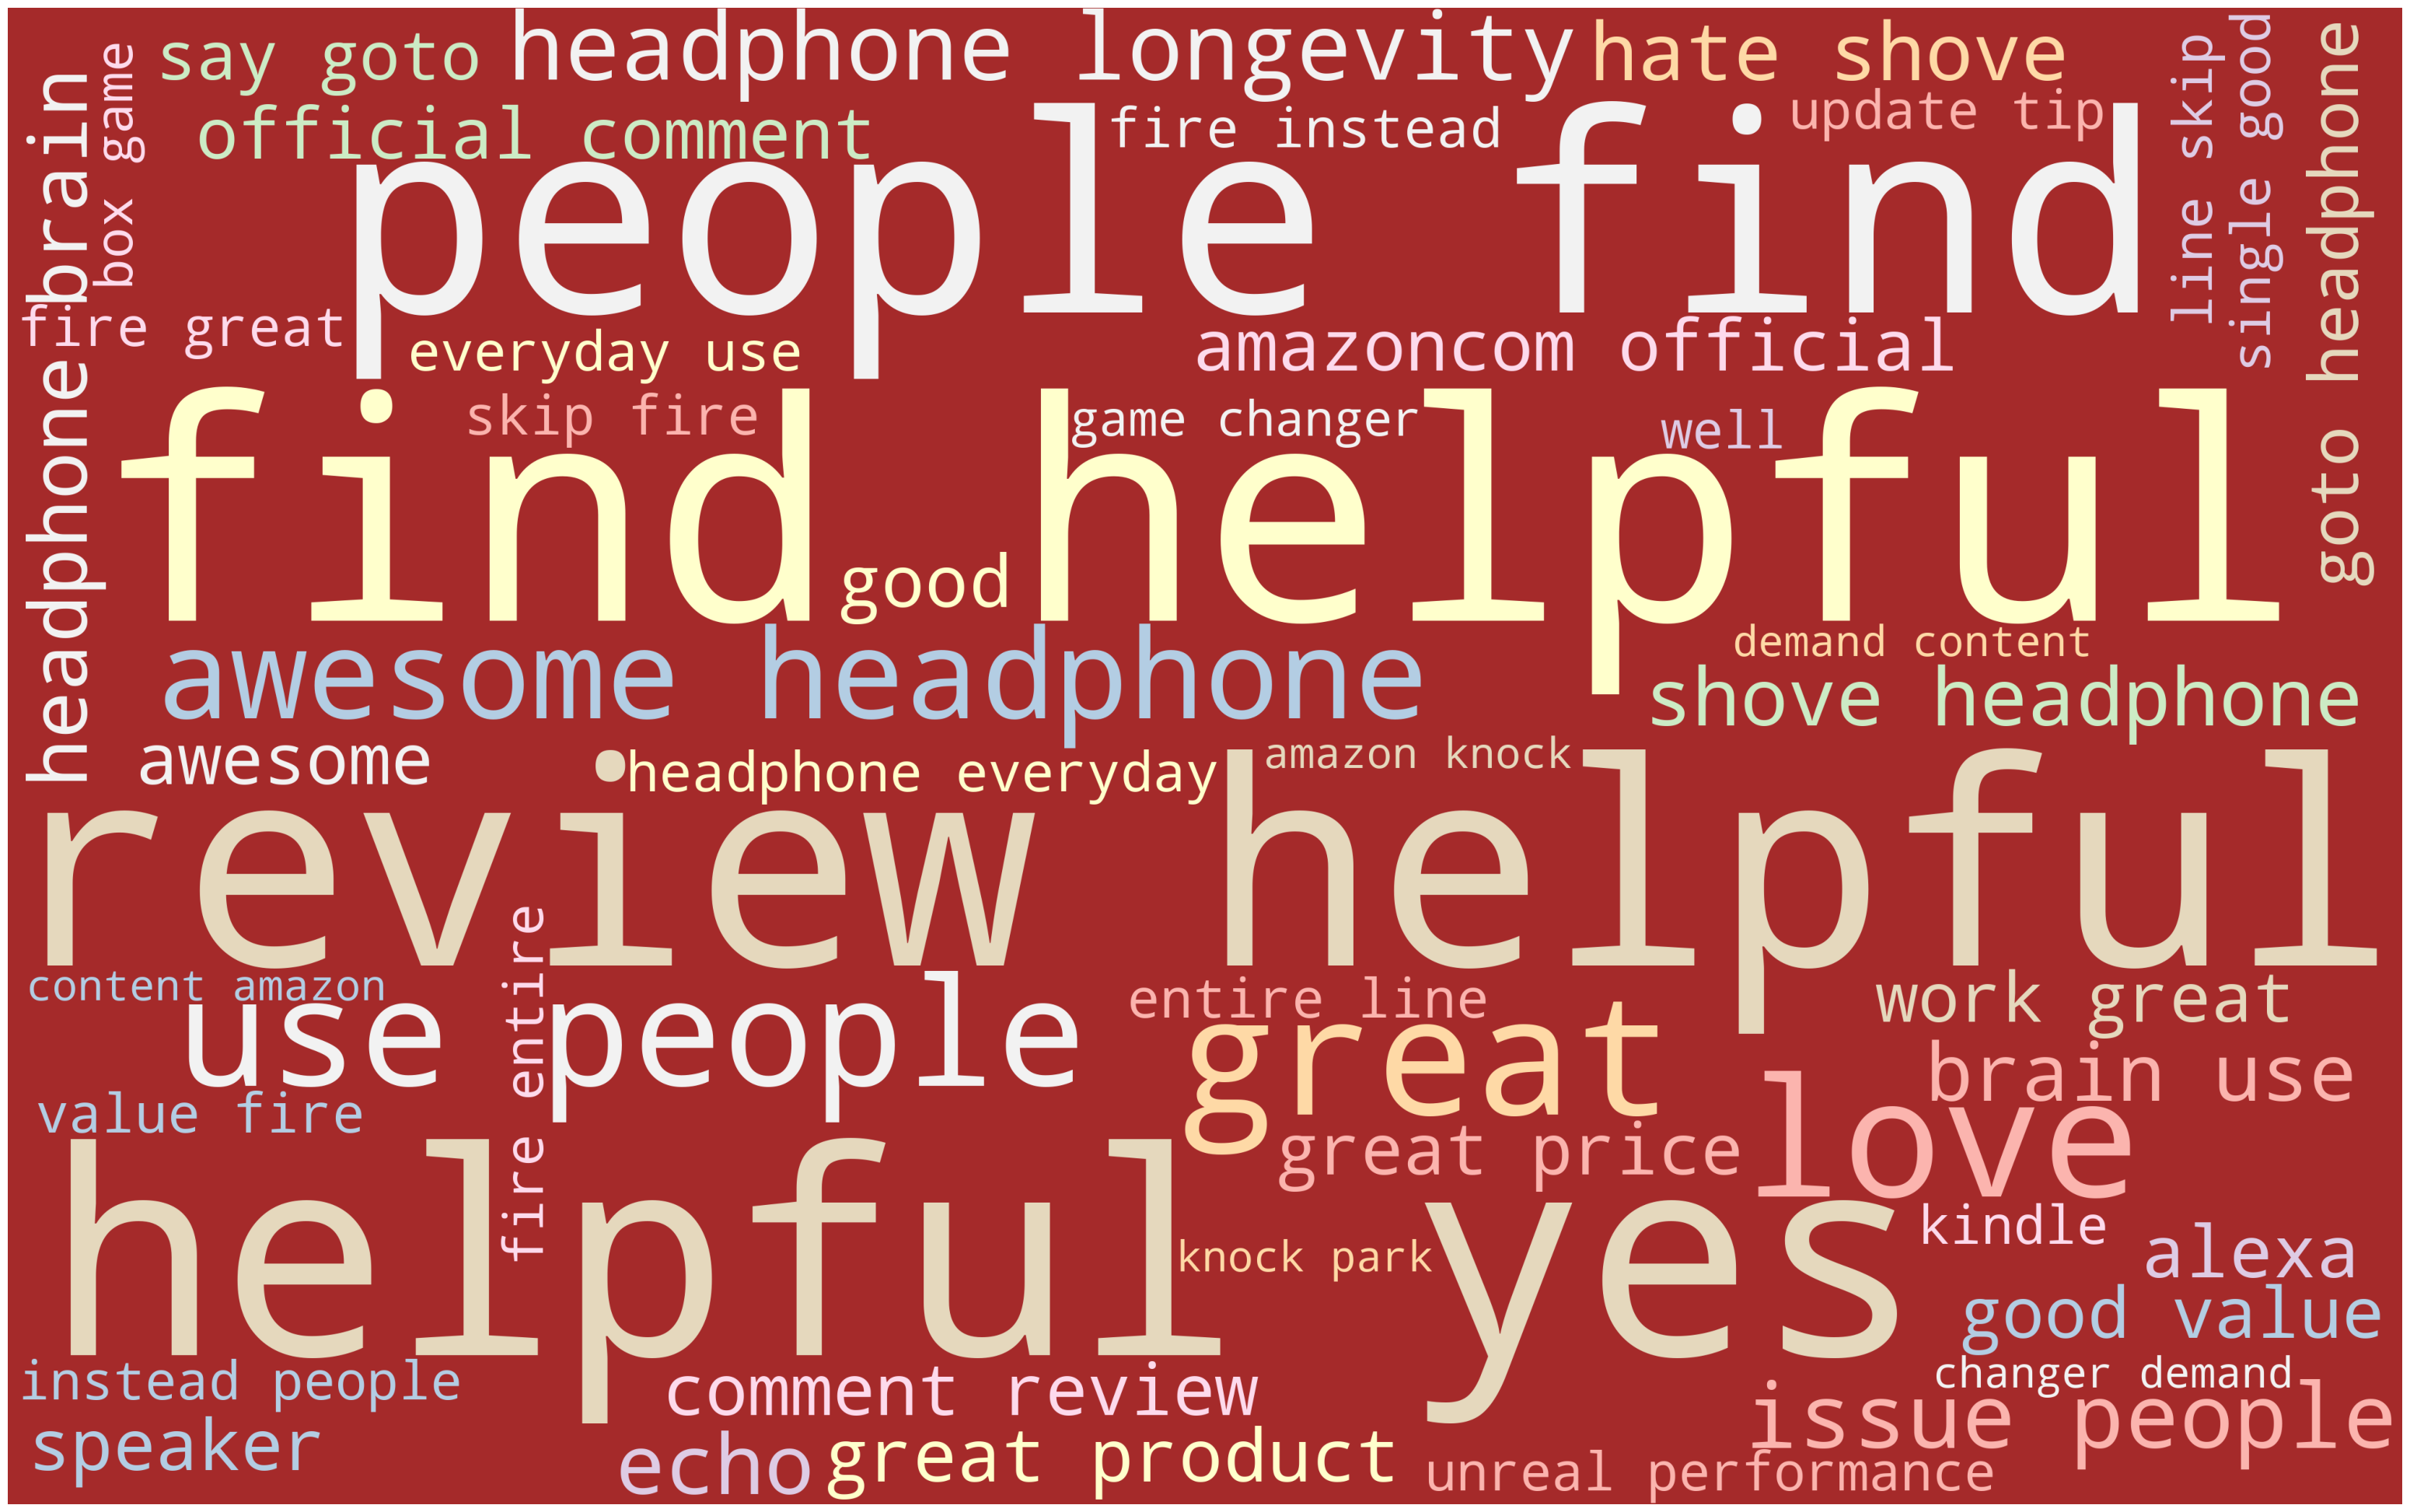

In [88]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(50,25))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud


wordcloud=WordCloud(width=4000,height=2500,background_color='brown',max_words=50,
                   colormap='Pastel1',stopwords=STOPWORDS).generate(amz_echo_rev)
plot_cloud(wordcloud)

### Emotional mining and sentiment analysis

In [91]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(amz_echo))
sentences

['Paperwhite voyage, no regrets!',
 'One Simply Could Not Ask For More Great for those that just want an e-reader Love / Hate relationship I LOVE IT Great device for reading.',
 '8 people found this helpful.',
 'Was this review helpful to you Yes No One Simply Could Not Ask For More 28 people found this helpful.',
 'Was this review helpful to you Yes No Definitely better than the previous generation 16 people found this helpful.',
 'Was this review helpful to you Yes No Paperwhite voyage, no regrets!',
 '16 people found this helpful.',
 'Was this review helpful to you Yes No Great for those that just want an e-reader 19 people found this helpful.',
 'Was this review helpful to you Yes No Give this to a book-loving-new-mommy-who-breastfeeds 34 people found this helpful.',
 'Was this review helpful to you Yes No Trouble-free international shipping, and easy to convert ePub 9 people found this helpful.',
 'Was this review helpful to you Yes No Great for those that just want an e-reader 18

In [93]:
amz_rev_sentence_df=pd.DataFrame(sentences,columns=['sentence'])

In [96]:
amz_rev_affin=pd.read_csv('Afinn_words.csv',encoding='Latin-1')

In [97]:
amz_rev_affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [99]:
amz_rev_affinity_scores=amz_rev_affin.set_index('word')['value'].to_dict()


In [100]:
nlp=spacy.load('en_core_web_lg')
amz_echo_sentiment_lex=amz_rev_affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=amz_echo_sentiment_lex.get(word.lemma_,0)
    return sent_score

In [102]:
calculate_sentiment(text='love')

3

In [103]:
calculate_sentiment(text='hate')

-3

In [104]:
amz_rev_sentence_df['sentiment_value']=amz_rev_sentence_df['sentence'].apply(calculate_sentiment)
amz_rev_sentence_df['sentiment_value']

0       -3
1       10
2        2
3        4
4        4
        ..
1127     0
1128    -2
1129     0
1130    -3
1131    -5
Name: sentiment_value, Length: 1132, dtype: int64

In [105]:
amz_rev_sentence_df['word_countings']=amz_rev_sentence_df['sentence'].str.split().apply(len)
amz_rev_sentence_df['word_countings']

0        4
1       26
2        5
3       20
4       19
        ..
1127     9
1128    29
1129     3
1130     5
1131    19
Name: word_countings, Length: 1132, dtype: int64

In [106]:
amz_rev_sentence_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_countings
1131,Waste of time Overpriced I am sending all of t...,-5,19
1120,Amazon fire tv remote sucks!,-5,5
1114,Longevity An Issue I hate having to shove head...,-3,15
932,"Longevity An Issue 1, I would say these are th...",-3,27
764,"11, Best Value, Especially with Prime, but bew...",-3,19
...,...,...,...
888,Love my Echo Tap Fun and Useful with Great Sou...,30,68
908,A nice buy Not what I expected didn't work Per...,33,50
832,Great speaker excellent product Enjoy my amazi...,51,78
833,Amazon Tap Very good bluetooth speaker When it...,56,73


In [107]:
amz_rev_sentence_df[amz_rev_sentence_df['sentiment_value']<=0]

,sentence,sentiment_value,word_countings
0,"Paperwhite voyage, no regrets!",-3,4
5,Was this review helpful to you Yes No Paperwhi...,-1,12
42,Amazon knocked it out of the park.,0,7
43,Refreshed UPDATED with Tips!,0,4
44,and HBO GO!,0,3
...,...,...,...
1127,Not what I expected from an Amazon produced pr...,0,9
1128,"OEM Remote gave out after 12 months, consideri...",-2,29
1129,Battery draining remote!!!!,0,3
1130,replacing an even worse remote.,-3,5


In [108]:
amz_rev_sentence_df[amz_rev_sentence_df['sentiment_value']>=0]

,sentence,sentiment_value,word_countings
1,One Simply Could Not Ask For More Great for th...,10,26
2,8 people found this helpful.,2,5
3,Was this review helpful to you Yes No One Simp...,4,20
4,Was this review helpful to you Yes No Definite...,4,19
6,16 people found this helpful.,2,5
...,...,...,...
1121,"Faulty remote, short life span Worked for a wh...",0,10
1125,"update, no longer Works with Fire TV If you ar...",1,22
1126,On my third replacement remote... Don't Buy It.,0,8
1127,Not what I expected from an Amazon produced pr...,0,9


In [109]:
amz_rev_sentence_df['index']=range(0,len(amz_rev_sentence_df))
amz_rev_sentence_df

,sentence,sentiment_value,word_countings,index
0,"Paperwhite voyage, no regrets!",-3,4,0
1,One Simply Could Not Ask For More Great for th...,10,26,1
2,8 people found this helpful.,2,5,2
3,Was this review helpful to you Yes No One Simp...,4,20,3
4,Was this review helpful to you Yes No Definite...,4,19,4
...,...,...,...,...
1127,Not what I expected from an Amazon produced pr...,0,9,1127
1128,"OEM Remote gave out after 12 months, consideri...",-2,29,1128
1129,Battery draining remote!!!!,0,3,1129
1130,replacing an even worse remote.,-3,5,1130


<Axes: xlabel='index', ylabel='sentiment_value'>

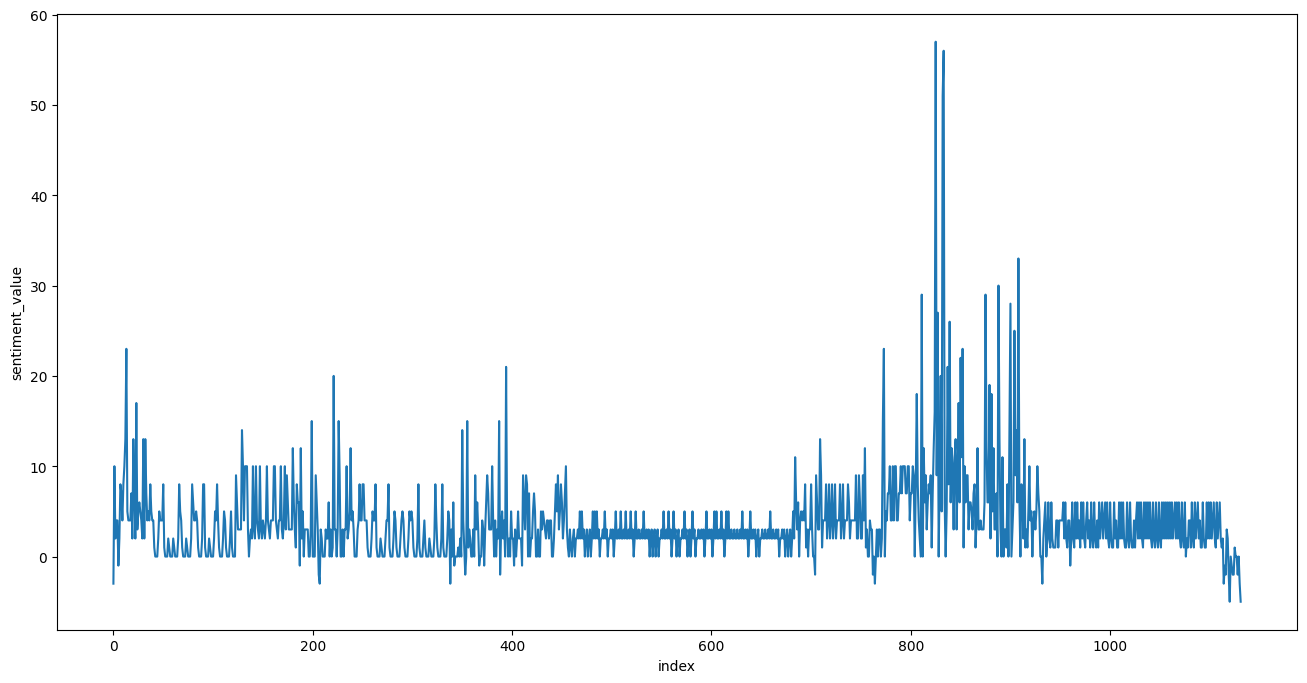

In [113]:
plt.figure(figsize=(16,8))
sns.lineplot(y='sentiment_value',x='index',data=amz_rev_sentence_df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5456\731264388.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amz_rev_sentence_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

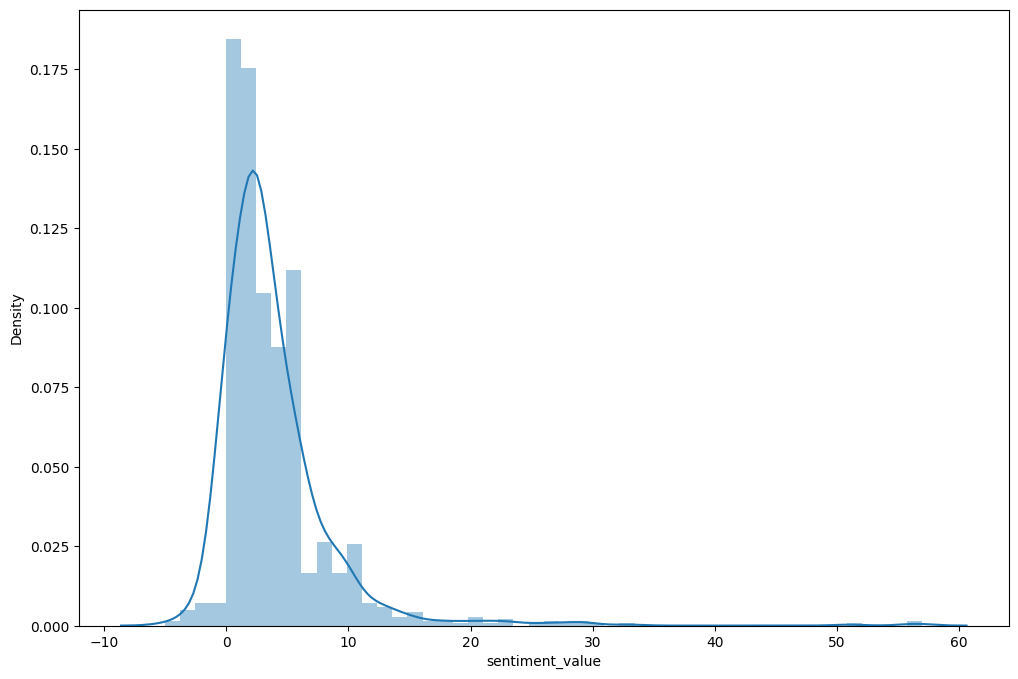

In [111]:
plt.figure(figsize=(12,8))
sns.distplot(amz_rev_sentence_df['sentiment_value'])